# Data Wrangling: Dallas Traffic Accidents 
<hr>

## Importing Relevant Libraries

In [30]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

In [31]:
#supress warnings
import warnings
warnings.filterwarnings("ignore")

# To Display all columns 
pd.set_option('display.max_columns', None)

style.use(['science', 'notebook', 'grid'])

In [32]:
dallas_city = pd.read_csv('../dataset/raw/Dallas_City_Data_2021.csv', index_col='ID')
dallas_city.head(5)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-11786,2,2016-11-30 15:29:48,2016-11-30 21:29:48,32.84365,-96.77463,32.81833,-96.78806,1.915,Between Mockingbird Ln/Exit 3 and Knox St/Hend...,NaN,US-75 S,R,Dallas,Dallas,TX,75205,US,US/Central,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-11787,2,2016-11-30 15:41:16,2016-11-30 21:41:16,32.84662,-96.63736,32.84640,-96.63711,0.021,At La Prada Dr/Exit 9 - Accident.,NaN,I-635 S,R,Dallas,Dallas,TX,75228,US,US/Central,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-11794,3,2016-11-30 16:16:05,2016-11-30 22:16:05,32.79385,-96.70278,32.79498,-96.69424,0.502,At Jim Miller Rd/Exit 51 - Accident.,NaN,R L Thornton Fwy E,R,Dallas,Dallas,TX,75228,US,US/Central,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-11795,3,2016-11-30 16:16:05,2016-11-30 22:16:05,32.85710,-96.77046,32.84623,-96.77330,0.769,Between Caruth Haven Ln/Exit 4 and Lovers Ln/E...,NaN,Southwestern Blvd,R,Dallas,Dallas,TX,75225,US,US/Central,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
A-11798,3,2016-11-30 16:21:05,2016-11-30 22:21:05,32.87684,-96.81001,32.88004,-96.80963,0.222,At Walnut Hill Ln - Accident.,NaN,Dallas North Tollway N,R,Dallas,Dallas,TX,75225,US,US/Central,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [33]:
#Checking the dtype
dallas_city.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41615 entries, A-11786 to A-2845068
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Severity               41615 non-null  int64  
 1   Start_Time             41615 non-null  object 
 2   End_Time               41615 non-null  object 
 3   Start_Lat              41615 non-null  float64
 4   Start_Lng              41615 non-null  float64
 5   End_Lat                41615 non-null  float64
 6   End_Lng                41615 non-null  float64
 7   Distance(mi)           41615 non-null  float64
 8   Description            41615 non-null  object 
 9   Number                 14798 non-null  float64
 10  Street                 41615 non-null  object 
 11  Side                   41615 non-null  object 
 12  City                   41615 non-null  object 
 13  County                 41615 non-null  object 
 14  State                  41615 non-null  object 
 1

In [34]:
# Closer look at the names of the columns or attributes
dallas_city.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [35]:
dallas_city.shape

(41615, 46)

In [36]:
# Distribution of the Data
dallas_city.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,41615.000000,41615.000000,41615.000000,41615.000000,41615.000000,41615.000000,14798.000000,41517.000000,33651.000000,41515.000000,41528.000000,41506.000000,40805.000000,33777.000000
mean,2.168161,32.810865,-96.796576,32.810890,-96.796539,0.519945,5072.287133,67.786858,65.893694,61.806239,29.546073,9.507942,8.955949,0.006056
std,0.423263,0.086094,0.070059,0.085941,0.070672,0.777038,3871.460201,17.011423,19.079469,20.651219,0.316948,2.069479,5.062563,0.049506
min,1.000000,32.620309,-97.072350,32.618569,-97.094565,0.000000,1.000000,1.000000,-12.000000,9.000000,28.720000,0.000000,0.000000,0.000000
25%,2.000000,32.749444,-96.839399,32.750629,-96.838176,0.073000,2200.000000,55.000000,54.000000,46.000000,29.320000,10.000000,6.000000,0.000000
50%,2.000000,32.801460,-96.800290,32.801264,-96.801068,0.243000,4031.000000,70.000000,69.000000,62.000000,29.480000,10.000000,8.100000,0.000000
75%,2.000000,32.887905,-96.755401,32.887405,-96.753867,0.672000,7539.750000,81.000000,80.000000,79.000000,29.730000,10.000000,12.000000,0.000000
max,4.000000,33.015130,-96.556901,33.023800,-96.557576,10.622000,39636.000000,105.100000,102.000000,100.000000,30.830000,13.000000,211.000000,2.100000


### Make Column names more self-explanatory

In [37]:
dallas_city.rename(columns={'Number': 'Street_Number', 
                            'Street':'Street_Name', 
                            'Side': 'Street_Side'}, inplace=True)
dallas_city.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street_Number,Street_Name,Street_Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-11786,2,2016-11-30 15:29:48,2016-11-30 21:29:48,32.84365,-96.77463,32.81833,-96.78806,1.915,Between Mockingbird Ln/Exit 3 and Knox St/Hend...,NaN,US-75 S,R,Dallas,Dallas,TX,75205,US,US/Central,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-11787,2,2016-11-30 15:41:16,2016-11-30 21:41:16,32.84662,-96.63736,32.84640,-96.63711,0.021,At La Prada Dr/Exit 9 - Accident.,NaN,I-635 S,R,Dallas,Dallas,TX,75228,US,US/Central,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-11794,3,2016-11-30 16:16:05,2016-11-30 22:16:05,32.79385,-96.70278,32.79498,-96.69424,0.502,At Jim Miller Rd/Exit 51 - Accident.,NaN,R L Thornton Fwy E,R,Dallas,Dallas,TX,75228,US,US/Central,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-11795,3,2016-11-30 16:16:05,2016-11-30 22:16:05,32.85710,-96.77046,32.84623,-96.77330,0.769,Between Caruth Haven Ln/Exit 4 and Lovers Ln/E...,NaN,Southwestern Blvd,R,Dallas,Dallas,TX,75225,US,US/Central,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
A-11798,3,2016-11-30 16:21:05,2016-11-30 22:21:05,32.87684,-96.81001,32.88004,-96.80963,0.222,At Walnut Hill Ln - Accident.,NaN,Dallas North Tollway N,R,Dallas,Dallas,TX,75225,US,US/Central,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


### Confirm single-valued columns

Since we extracted the traffic accident data for Dallas from the US-Accidents, we expect that the following Columns below have values that are shared across all the records in the dataset

In [38]:
dallas_city[['City', 'State', 'Country', 'Timezone']]

,City,State,Country,Timezone
ID,,,,
A-11786,Dallas,TX,US,US/Central
A-11787,Dallas,TX,US,US/Central
A-11794,Dallas,TX,US,US/Central
A-11795,Dallas,TX,US,US/Central
A-11798,Dallas,TX,US,US/Central
...,...,...,...,...
A-2844612,Dallas,TX,US,US/Central
A-2844627,Dallas,TX,US,US/Central
A-2844632,Dallas,TX,US,US/Central


### Note: 

<div class="alert alert-info">
As shown in the previous jupyter notebook in basic exploration of the US-Accidents data and confirmed in the above cell, some columns share the same values all throughout this subset since we extracted Dallas City dataset.
</div>    
<hr>

### Dropping unnecessary columns

In [39]:
dallas_city.drop(columns=['City', 'State', 'Country', 'Timezone' ], inplace=True)
dallas_city.head(5)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street_Number,Street_Name,Street_Side,County,Zipcode,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-11786,2,2016-11-30 15:29:48,2016-11-30 21:29:48,32.84365,-96.77463,32.81833,-96.78806,1.915,Between Mockingbird Ln/Exit 3 and Knox St/Hend...,NaN,US-75 S,R,Dallas,75205,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-11787,2,2016-11-30 15:41:16,2016-11-30 21:41:16,32.84662,-96.63736,32.84640,-96.63711,0.021,At La Prada Dr/Exit 9 - Accident.,NaN,I-635 S,R,Dallas,75228,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-11794,3,2016-11-30 16:16:05,2016-11-30 22:16:05,32.79385,-96.70278,32.79498,-96.69424,0.502,At Jim Miller Rd/Exit 51 - Accident.,NaN,R L Thornton Fwy E,R,Dallas,75228,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-11795,3,2016-11-30 16:16:05,2016-11-30 22:16:05,32.85710,-96.77046,32.84623,-96.77330,0.769,Between Caruth Haven Ln/Exit 4 and Lovers Ln/E...,NaN,Southwestern Blvd,R,Dallas,75225,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
A-11798,3,2016-11-30 16:21:05,2016-11-30 22:21:05,32.87684,-96.81001,32.88004,-96.80963,0.222,At Walnut Hill Ln - Accident.,NaN,Dallas North Tollway N,R,Dallas,75225,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [40]:
print(f'The number of columns is reduced to {dallas_city.shape[1]}.')

The number of columns is reduced to 42.


### Checking Missing Values in Dallas City subset 

In [41]:
na_count = dallas_city.isna().sum() # total count of missing values per column or feature
na_count

Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                      0
End_Lng                      0
Distance(mi)                 0
Description                  0
Street_Number            26817
Street_Name                  0
Street_Side                  0
County                       0
Zipcode                      0
Airport_Code                 7
Weather_Timestamp           63
Temperature(F)              98
Wind_Chill(F)             7964
Humidity(%)                100
Pressure(in)                87
Visibility(mi)             109
Wind_Direction             189
Wind_Speed(mph)            810
Precipitation(in)         7838
Weather_Condition          123
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabo

In [42]:
missing_val = na_count.reset_index()
missing_val.rename(columns={'index':'Field', 0:'Count'}, inplace=True)

missing_val['Percentage'] = round((missing_val['Count']/len(dallas_city))*100, 2) #calculating its percentage
missing_val.sort_values(by='Percentage', ascending=False, inplace=True)
missing_val

,Field,Count,Percentage
9,Street_Number,26817,64.44
17,Wind_Chill(F),7964,19.14
23,Precipitation(in),7838,18.83
22,Wind_Speed(mph),810,1.95
21,Wind_Direction,189,0.45
24,Weather_Condition,123,0.30
20,Visibility(mi),109,0.26
18,Humidity(%),100,0.24
16,Temperature(F),98,0.24
19,Pressure(in),87,0.21


In [43]:
print("Missing Value Percentage by Field\n")

for _, row in missing_val.iterrows():
    if row['Percentage'] > 0:
        print(f'{row["Field"]}: {row["Percentage"]}%')

Missing Value Percentage by Field

Street_Number: 64.44%
Wind_Chill(F): 19.14%
Precipitation(in): 18.83%
Wind_Speed(mph): 1.95%
Wind_Direction: 0.45%
Weather_Condition: 0.3%
Visibility(mi): 0.26%
Humidity(%): 0.24%
Temperature(F): 0.24%
Pressure(in): 0.21%
Weather_Timestamp: 0.15%
Airport_Code: 0.02%


## Visualizing Missing Data with Missingno Library

### Bar Chart

<AxesSubplot:>

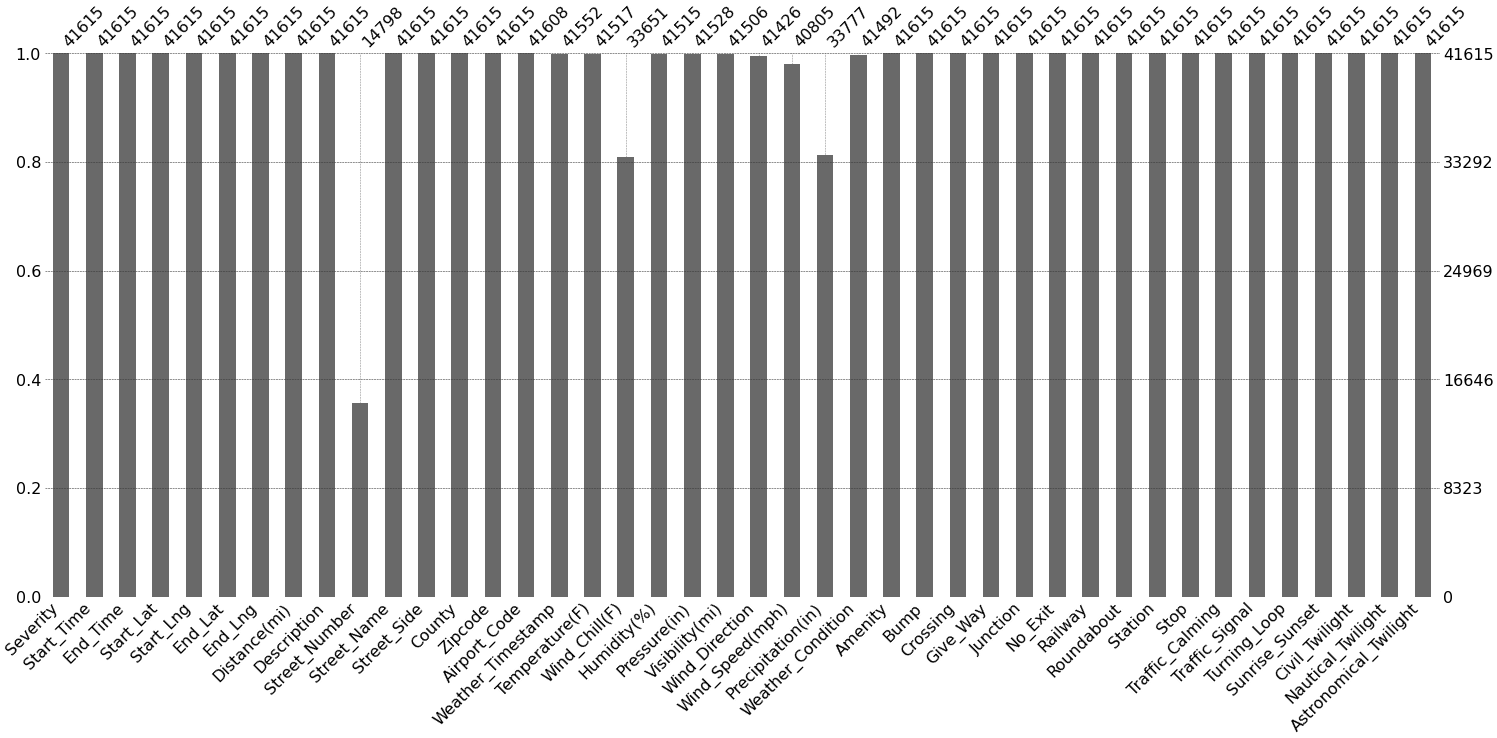

In [44]:
msno.bar(dallas_city)

### Matrix Chart

<AxesSubplot:>

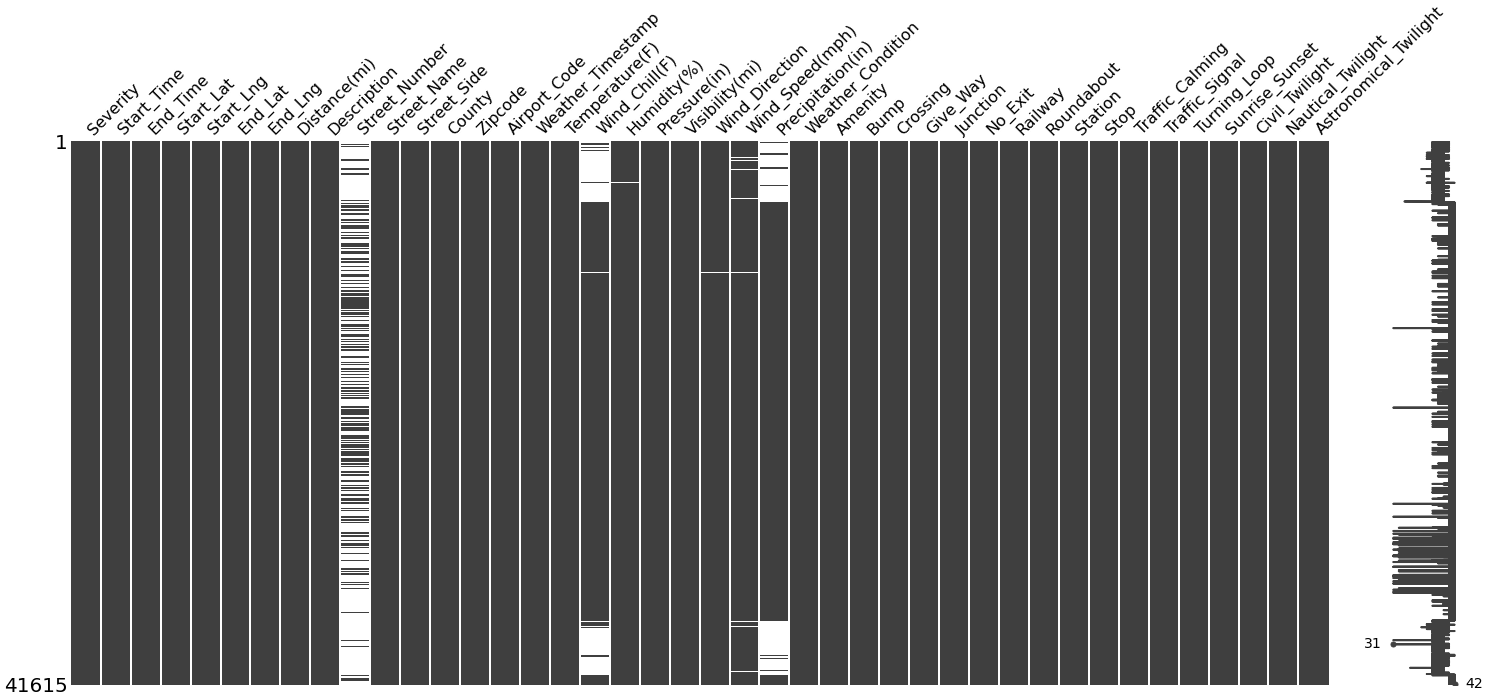

In [45]:
msno.matrix(dallas_city)

### Heat Map

<AxesSubplot:>

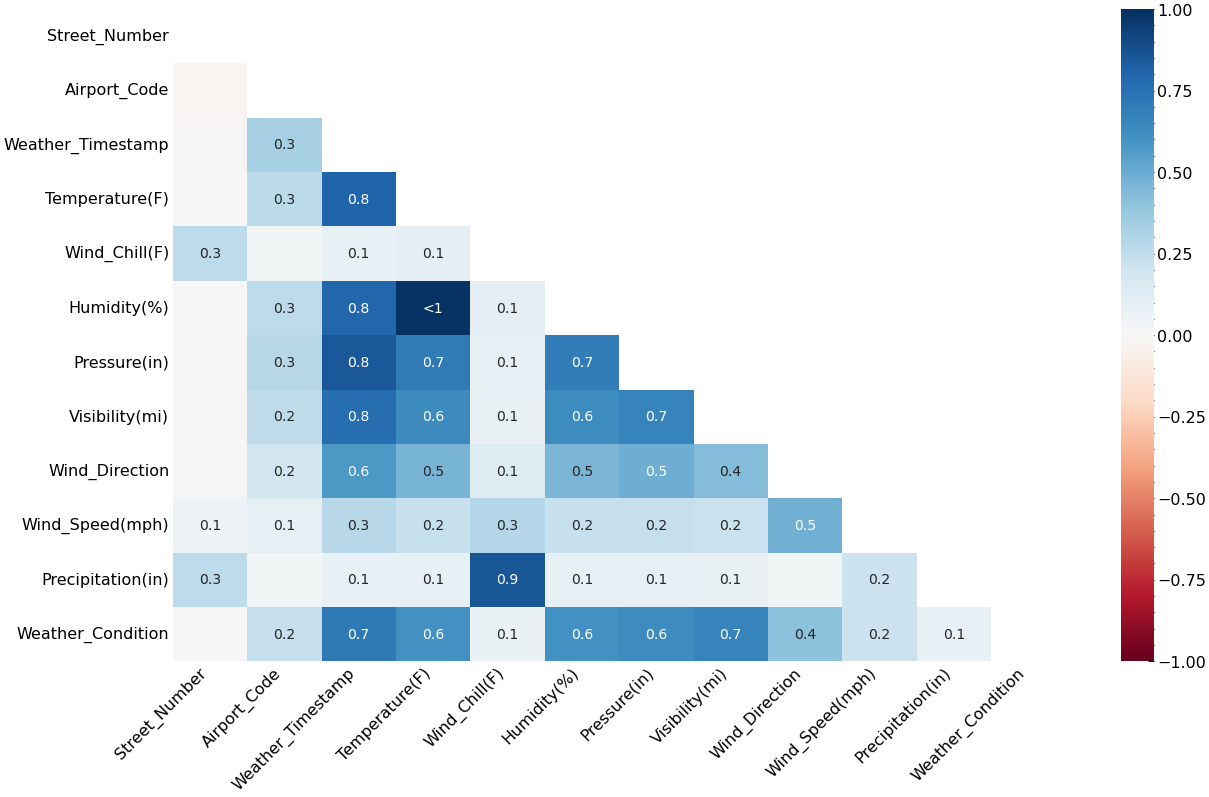

In [46]:
msno.heatmap(dallas_city)

### Dendrogram

<AxesSubplot:>

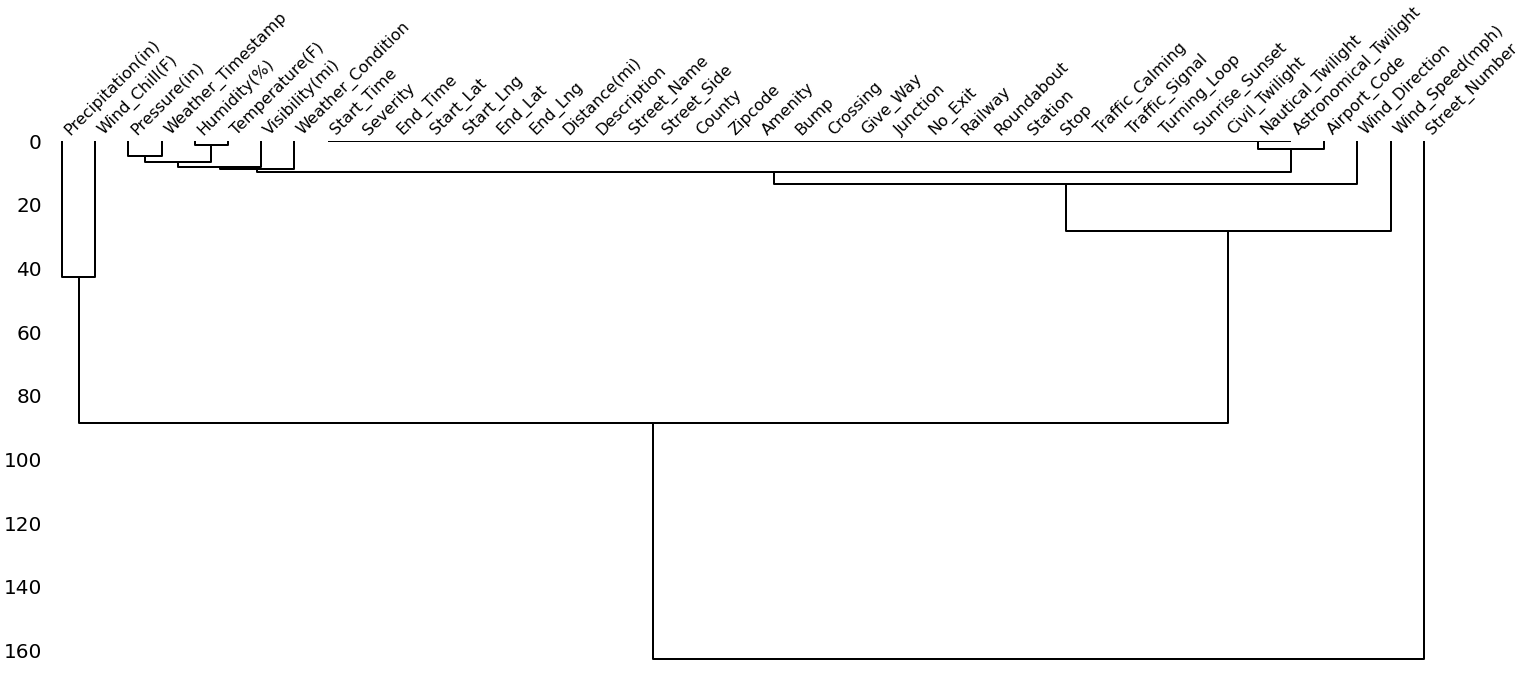

In [47]:
msno.dendrogram(dallas_city)

<hr>

## Dealing with columns or features with missing values
<br>

<div class="alert alert-info">
1. Dropping Columns or features<br>
2. Imputing Averages<br>
3. Assigning New Category
<div>

### Dropping Street Number

<div class="alert alert-info">
    We are dropping the Street_Number column because 65% of its data are missing, which is already the majority of the data at this specific variable. With that, to avoid bias we will drop Street_Number as it is no longer significant.
</div>

In [48]:
dallas_city.drop(columns=['Street_Number'], inplace=True)
dallas_city

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street_Name,Street_Side,County,Zipcode,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-11786,2,2016-11-30 15:29:48,2016-11-30 21:29:48,32.84365,-96.774630,32.81833,-96.78806,1.915,Between Mockingbird Ln/Exit 3 and Knox St/Hend...,US-75 S,R,Dallas,75205,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-11787,2,2016-11-30 15:41:16,2016-11-30 21:41:16,32.84662,-96.637360,32.84640,-96.63711,0.021,At La Prada Dr/Exit 9 - Accident.,I-635 S,R,Dallas,75228,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-11794,3,2016-11-30 16:16:05,2016-11-30 22:16:05,32.79385,-96.702780,32.79498,-96.69424,0.502,At Jim Miller Rd/Exit 51 - Accident.,R L Thornton Fwy E,R,Dallas,75228,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-11795,3,2016-11-30 16:16:05,2016-11-30 22:16:05,32.85710,-96.770460,32.84623,-96.77330,0.769,Between Caruth Haven Ln/Exit 4 and Lovers Ln/E...,Southwestern Blvd,R,Dallas,75225,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
A-11798,3,2016-11-30 16:21:05,2016-11-30 22:21:05,32.87684,-96.810010,32.88004,-96.80963,0.222,At Walnut Hill Ln - Accident.,Dallas North Tollway N,R,Dallas,75225,KDAL,2016-11-30 15:53:00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A-2844612,3,2019-08-22 08:59:31,2019-08-22 09:27:33,32.86174,-96.657570,32.86653,-96.66512,0.549,At Northwest Hwy/Exit 11 - Accident.,I-635 W,R,Dallas,75228,KDAL,2019-08-22 08:53:00,84.0,84.0,61.0,29.46,10.0,S,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-2844627,3,2019-08-22 17:54:40,2019-08-22 18:23:27,32.67827,-96.822740,32.67153,-96.82262,0.466,At Laureland Rd/Exit 420 - Accident. Two lanes...,US-77 S,R,Dallas,75232,KRBD,2019-08-22 17:53:00,96.0,96.0,36.0,29.09,10.0,S,12.0,0.0,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-2844632,3,2019-08-22 23:50:30,2019-08-23 00:19:59,32.92601,-96.820616,32.92601,-96.82072,0.006,At Dallas North Tlwy - Accident.,LBJ Express,R,Dallas,75240,KADS,2019-08-22 23:55:00,88.0,88.0,48.0,29.21,10.0,SSE,8.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


### Imputing Mode (Wind_Chill)

In [49]:
dallas_city['Wind_Chill(F)'].dtype

dtype('float64')

In [50]:
dallas_city['Wind_Chill(F)'].describe()

count    33651.000000
mean        65.893694
std         19.079469
min        -12.000000
25%         54.000000
50%         69.000000
75%         80.000000
max        102.000000
Name: Wind_Chill(F), dtype: float64

In [51]:
dallas_city['Wind_Chill(F)'].value_counts()

72.0    945
77.0    940
70.0    928
68.0    767
75.0    759
       ... 
37.4      1
36.9      1
36.2      1
29.7      1
6.8       1
Name: Wind_Chill(F), Length: 322, dtype: int64

In [52]:
# Imputing Mode (most frequent) Wind_Chill value in Fahrenheit to fill the missing values

dallas_city['Wind_Chill(F)'] = dallas_city['Wind_Chill(F)'].fillna(dallas_city['Wind_Chill(F)'].value_counts().index[0])
dallas_city['Wind_Chill(F)'].value_counts()

72.0    8909
77.0     940
70.0     928
68.0     767
75.0     759
        ... 
18.4       1
36.3       1
13.4       1
18.2       1
45.2       1
Name: Wind_Chill(F), Length: 322, dtype: int64

### Precipitation 

Precipitation amount in inches. 

<div class="alert alert-info">
    
 In the United States, precipitation is commonly represented in inches per 24-hour period. <br>This means that if one inch of rain fell in a 24-hour period and, theoretically, water wasn't absorbed by the ground <br>nor did it flow downhill, after the storm there would be a layer of one inch of water covering the ground.
    
    
 Do you know how observers measure precipitation? (2004, August 4). ThoughtCo. https://www.thoughtco.com/measuring-precipitation-1435346
</div>

In [53]:
dallas_city['Precipitation(in)'].dtype

dtype('float64')

In [54]:
dallas_city['Precipitation(in)'].value_counts()

0.00    31689
0.01      565
0.02      275
0.03      178
0.04      142
        ...  
1.67        1
2.01        1
0.73        1
0.82        1
2.10        1
Name: Precipitation(in), Length: 80, dtype: int64

In [55]:
dallas_city['Precipitation(in)'].describe()

count    33777.000000
mean         0.006056
std          0.049506
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.100000
Name: Precipitation(in), dtype: float64

<div class="alert alert-info">
    Since there is a significant percentage of missing values in the Precipitation(in) variable. We will examine its missingness in order to apply relevant and appropriate missing data handling technique to prevent introducing a bias in the model or your data. 
</div>

In [56]:
dallas_city['Precipitation(in)'].isna().sum()

7838

### Checking for duplicates

In [57]:
# Check if there are duplicate entries or records
dallas_city[dallas_city.duplicated()]

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street_Name,Street_Side,County,Zipcode,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


**Note: There are no duplicates in the data**

## Investigating Columns

### 1. Start_Time & End_Time

Confirm if _'Start_Time'_ and _'End_Time'_ are of valid Datetime type

In [58]:
# If this code returns an error then the Start_Time is not a valid datetime 
dallas_city.loc['A-11786', 'Start_Time'].day_name()

AttributeError: 'str' object has no attribute 'day_name'

### Convert to Datetime type

In [ ]:
dallas_city['Start_Time'] = pd.to_datetime(dallas_city['Start_Time'])
dallas_city['End_Time'] = pd.to_datetime(dallas_city['End_Time'])

dallas_city.head(5)

In [ ]:
type(dallas_city.loc['A-11786', 'Start_Time'])

In [ ]:
#Calculate the timedelta of the End Time and Start Time
df = (dallas_city['End_Time'] - dallas_city['Start_Time'])
df

In [ ]:
df.describe()

In [ ]:
df

### Converting timedelta to hours

In [ ]:
def tdelta_to_hours(timedelta):
    hr, r = divmod(int(timedelta.total_seconds()), 60*60)
    mins, sec = divmod(r, 60)
    hr, mins, sec = (str(x).zfill(2) for x in (hr, mins, sec))
    return f"{hr}:{mins}:{sec}"

dallas_city['Duration'] = df.apply(tdelta_to_hours)
dallas_city

### 2. Description: Confirm whether there is a uniform parttern we can extract

In [ ]:
dallas_city.loc['A-2844612':'A-2845068', 'Description']

### Note:

<div class="alert alert-info center">
Looking at a subset of the 'Description' series, we notice that it might follow a certain pattern that may or may not include road blockage and traffic condition details.Hence, we will look at this more closely by splitting the entire string object and expand into new columns.
</div>


In [ ]:
df = dallas_city['Description'].str.split('.', 1, expand=True)
df

In [ ]:
df.rename(columns={1:'Impact'}, inplace=True)

In [ ]:
df[['Description', 'Status']] = df[0].str.rsplit(' - ', 1, expand=True)
df.drop(columns=[0], inplace=True)
df

In [ ]:
pd.DataFrame(df['Status'].value_counts()).reset_index().rename(columns={'index':'Status', 'Status':'Count'})

In [ ]:
pd.DataFrame(df['Impact'].value_counts()).reset_index().rename(columns={'index':'Impact', 'Impact':'Count'})

In [ ]:
df['Description'].value_counts()

In [ ]:
df['Impact'].value_counts()

In [ ]:
df['Impact'].tail()

In [ ]:
# Check total missing values per column
df.isna().sum()

### Note: 

<div class="alert alert-warning">
Although there are important details in the description pertaining to traffic impact, road blockage and type of incident , it is really hard to tell and extract these as it does not follow a particular pattern in contrary to what we assumed. And the specific information available is not consistent.
</div>
    
<hr>

In [ ]:
# Drop the Description instead
dallas_city.drop(columns=['Description'], inplace=True)
dallas_city

In [ ]:
#Deleting df dataframe
del df

## Display records with NaN values in attribute "Weather Condition" <hr>

In [ ]:
dallas_city[dallas_city['Weather_Condition'].isna()].head()

In [ ]:
dallas_city.Weather_Condition.value_counts()

In [ ]:
#Exploring accidents with Weather Conditions 
dallas_city[dallas_city['Weather_Condition'].isna()!=True].head()

In [ ]:
# Exploring accidents where the Weather Condition is Mostly Cloudy
dallas_city[dallas_city['Weather_Condition']=='Mostly Cloudy'].head()

In [ ]:
# Checking the number of accidents that fall under each Severity Levels under Mostly Cloudly weather condition

dallas_city[dallas_city['Weather_Condition']=='Mostly Cloudy']['Severity'].value_counts()

### Change the Order of the Columns

In [ ]:
dallas_city.reindex(columns = ['Severity', 'Start_time', 'End_Time', 'Duration', 
                               'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance', 
                              'Street_Number', 'Street_Name', 'Street_Side', 'Zipcode', 'County'])

## Using Advanced Matplotlib API <hr>

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
ax[0][0].hist(dallas_city.Severity, edgecolor='black', bins=10)
ax[0][0].set_xlabel('Accident Severity')
ax[0][0].set_ylabel('Frequency of Accidents')
ax[0][0].set_title('Frequency vs Severity')
# ax[0][1].scatter(dallas_city.ID,dallas_city.Severity)
# ax[0][1].set_xlabel('Accident Severity')
# ax[0][1].set_ylabel('Frequency of Accidents')
# ax[0][1].set_title('Frequency vs Severity')
plt.show()

In [ ]:
dallas_city.hist(bins=30, figsize=(20,15), color='green', edgecolor='black')
plt.show()

In [ ]:
plt.hist(dallas_city.Severity, bins=[1,2,3,4,5], edgecolor='black', rwidth=0.8, color='blue')
plt.title("Frequency vs Severity")
plt.xlabel("Severity")
plt.ylabel("Frequency of Accidents")
plt.show()

In [ ]:
dallas_city[['Severity','Description']]